# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     11/27/2020
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/11-27-2020">
      14,078.12448
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/11-27-2020">
      USD IDR rate for 11/27/2020
     </a>
    </td>
   </tr>
   <tr>
    <td>
     11/26/2020
    </td>



In [5]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr><td>11/27/2020</td><td>Friday</td><td><a href="/Rate/USD/IDR/11-27-2020">14,078.12448</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-27-2020">USD IDR rate for 11/27/2020</a></td></tr>,
 <tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]

    #get date
    period = row.find_all('td')[0].text
    period = period.strip() #for removing the excess whitespace
    
    #get days
    days = row.find_all('td')[1].text
    days = days.strip() #for removing the excess whitespace
    
    #get price rate
    priceRate = row.find_all('td')[2].text
    priceRate = priceRate.strip() #for removing the excess whitespace
    
    #get notes
    notes = row.find_all('td')[3].text
    notes = notes.strip() #for removing the excess whitespace
       
    temp.append((period,days, priceRate, notes)) 
    
temp 

[('11/26/2020', 'Thursday', '14,090.70769 IDR', 'USD IDR rate for 11/26/2020'),
 ('11/25/2020',
  'Wednesday',
  '14,136.09929 IDR',
  'USD IDR rate for 11/25/2020'),
 ('11/24/2020', 'Tuesday', '14,137.48161 IDR', 'USD IDR rate for 11/24/2020'),
 ('11/23/2020', 'Monday', '14,185.57119 IDR', 'USD IDR rate for 11/23/2020'),
 ('11/20/2020', 'Friday', '14,162.60519 IDR', 'USD IDR rate for 11/20/2020'),
 ('11/19/2020', 'Thursday', '14,165.50144 IDR', 'USD IDR rate for 11/19/2020'),
 ('11/18/2020',
  'Wednesday',
  '14,051.29503 IDR',
  'USD IDR rate for 11/18/2020'),
 ('11/17/2020', 'Tuesday', '14,040.16051 IDR', 'USD IDR rate for 11/17/2020'),
 ('11/16/2020', 'Monday', '14,085.69501 IDR', 'USD IDR rate for 11/16/2020'),
 ('11/13/2020', 'Friday', '14,142.77143 IDR', 'USD IDR rate for 11/13/2020'),
 ('11/12/2020', 'Thursday', '14,141.24303 IDR', 'USD IDR rate for 11/12/2020'),
 ('11/11/2020',
  'Wednesday',
  '14,073.46024 IDR',
  'USD IDR rate for 11/11/2020'),
 ('11/10/2020', 'Tuesday', '1

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','days', 'priceRate', 'notes'))
df.head()

,period,days,priceRate,notes
0,11/26/2020,Thursday,"14,090.70769 IDR",USD IDR rate for 11/26/2020
1,11/25/2020,Wednesday,"14,136.09929 IDR",USD IDR rate for 11/25/2020
2,11/24/2020,Tuesday,"14,137.48161 IDR",USD IDR rate for 11/24/2020
3,11/23/2020,Monday,"14,185.57119 IDR",USD IDR rate for 11/23/2020
4,11/20/2020,Friday,"14,162.60519 IDR",USD IDR rate for 11/20/2020


Setelah mendapatkan Data Frame yang diinginkan, disini saya melakukan beberapa langkah untuk memastikan bahwa Data Frame yang saya miliki sudah ideal untuk dapat di olah, mulai dari:

- Mendefinisikan tipe default data yang terdapat pada Data Frame awal
- Mengganti beberapa tipe default data menjadi tipe data yang lebih sesuai
- Menjadikan kolom Waktu (tanggal/bulan/tahun) menjadi Index dasar

In [8]:
df.dtypes


period       object
days         object
priceRate    object
notes        object
dtype: object

In [9]:
df['period'] = df['period'].astype('datetime64')

In [10]:
df['days'] = df['days'].astype('category')

In [11]:
df['priceRate'] = df['priceRate'].str.replace(" IDR","")
df['priceRate'] = df['priceRate'].str.replace(",","")
df['priceRate'] = df['priceRate'].astype('float64')

In [12]:
df['priceRate'] = df['priceRate'].round(2)

In [13]:
df = df.set_index(['period'])

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dashboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [14]:
df.sort_values(by='priceRate', ascending=True)

,days,priceRate,notes
period,,,
2020-06-08,Monday,13867.95,USD IDR rate for 6/8/2020
2020-06-09,Tuesday,13870.76,USD IDR rate for 6/9/2020
2020-06-11,Thursday,13966.85,USD IDR rate for 6/11/2020
2020-06-10,Wednesday,13976.92,USD IDR rate for 6/10/2020
2020-06-07,Sunday,13989.39,USD IDR rate for 6/7/2020
...,...,...,...
2020-09-13,Sunday,14876.45,USD IDR rate for 9/13/2020
2020-09-29,Tuesday,14880.93,USD IDR rate for 9/29/2020
2020-09-24,Thursday,14888.79,USD IDR rate for 9/24/2020


In [15]:
df.nunique()

days           6
priceRate    146
notes        146
dtype: int64

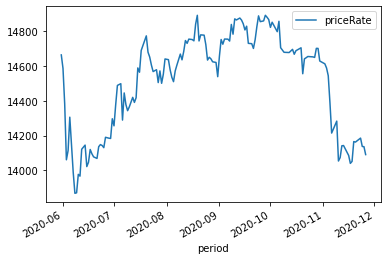

In [16]:
df.plot()

Berdasarkan data yang didapatkan dari situs https://www.exchange-rates.org/history/IDR/USD/T ini kita dapat menemukan bahwa hampir terjadi nya double bottom pada tingkat 'exchange rate' Rupiah terhadap dollar dalam kurun waktu 6 bulan terakhir, yakni di bulan Juni 2020 dan November 2020, dimana Rupiah menguat terhadap Dollar di 2 bulan ini dibandingkan dengan bulan lain nya yang tersedia pada data.

Terdapat penguatan nilai Rupiah terhadap Dollar yang cukup baik pada bulan Mei 2020 (dapat dilihat dari nilai terendah (`min`) di angka IDR 13,868 yang terjadi pada 08/06/2020). Apabila kita melihat terkait informasi pasar yang terjadi pada bulan tersebut, saya menemukan bahwa:

1. Pada bulan Juni 2020:

a. Pengaruh manca negara
- Pelaku pasar dinilai mulai sedikit lega melihat tensi hubungan AS & China yang mengendur. 
- Terdapat pernyataan dari Gedung Putih AS terkait tidak ada gelombang serangan kedua Covid-19 di AS juga cukup membuat lega pelaku pasar. 
- Proposal paket stimulus senilai US$1,5 triliun untuk pembangunan infrastruktur diperkirakan bakal berjalan mulus
- Di Eropa, berbagai indikator seperti indeks manufaktur dan penjualan rumah menunjukkan tanda-tanda pemulihan ekonomi.
        
b. Pengaruh domestik
- Kondisi perekonomian Indonesia masih tergolong lebih baik dibandingkan dengan negara lain di tengah pandemi virus corona, yakni tumbuh sebesar 2,97 persen pada kuartal I/2020.
- Terdapat pelonggaran dalam kebijakan PSBB menjadi PSBB transisi yang membuat beberapa sektor usaha mulai dapat aktif kembali.
- Pemerintah juga memperpanjang stimulus terutama dibidang kesehatan, bantuan langsung tunai, dan bantuan sosial hingga akhir 2020 untuk menjaga daya beli masyarakat. 
- Usaha dari Bank Indonesia untuk dapat menstabilkan mata uang Rupiah dan juga mengendalikan inflasi dengan melakukan koordinasi dengan pemerintah termasuk OJK dan LPS dalam menentukan bauran kebijakan.
        
Sumber berita: https://market.bisnis.com/read/20200625/93/1257369/nilai-tukar-rupiah-terhadap-dolar-as-hari-ini-25-juni-2020

Kesimpulan: Nilai tukar Rupiah terhadap Dollar dapat menguat salah satu nya dikarenakan pengaruh sentimen pasar yang terjadi pada keadaan Ekonomi baik Global maupun Domestik.

Informasi ini dapat menjadi salah satu referensi bagi trader Forex untuk dapat mengambil ancang-ancang pada saat ingin mulai meng-investasikan mata uang Rupiah yang mereka miliki pada waktu yang tepat

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.